# Problem Statement

Walmart, a multinational retail giant, wants to gain a deeper understanding of customer spending patterns to inform data-driven business decisions. The primary focus is to determine if significant differences exist in purchase behavior between male and female customers during Black Friday sales events. To achieve this goal, Walmart seeks to:

Examine Gender-Based Spending: Analyze historical transactional data to identify variations in average spending habits between male and female customers.
Establish Confidence Intervals: Utilize statistical techniques, such as the Central Limit Theorem, to establish confidence intervals around the average spending of male and female customer segments. This will help ascertain the range within which the true population averages are likely to fall.
Investigate Additional Factors: Explore the influence of other demographic factors, such as marital status and age groups, on customer spending patterns.
Derive Actionable Recommendations: Generate insights that align with the findings and propose strategic recommendations to refine Walmart's marketing, inventory management, and promotional activities.

# Exploratory Data Analysis

In [91]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Loading the Dataset

df = pd.read_csv("walmart_data.txt")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
# Rows and Columns of dataset

df.shape

(550068, 10)

In [5]:
df.info() # Identifying datatypes and null values of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
#Conversion of categorical columns
df[['User_ID', 'Marital_Status', 'Product_Category']] = df[['User_ID', 'Marital_Status', 'Product_Category']].astype('object')

In [11]:
# Statistical Summary
df.describe()

,Occupation,Purchase
count,550068.000000,550068.000000
mean,8.076707,9263.968713
std,6.522660,5023.065394
min,0.000000,12.000000
25%,2.000000,5823.000000
50%,7.000000,8047.000000
75%,14.000000,12054.000000
max,20.000000,23961.000000


In [12]:
# Fixing Marital_Staus column
marital_status_mapping = {0: 'Unmarried', 1: 'Married'}
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)

In [14]:
# Missing values check
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: ylabel='Occupation'>

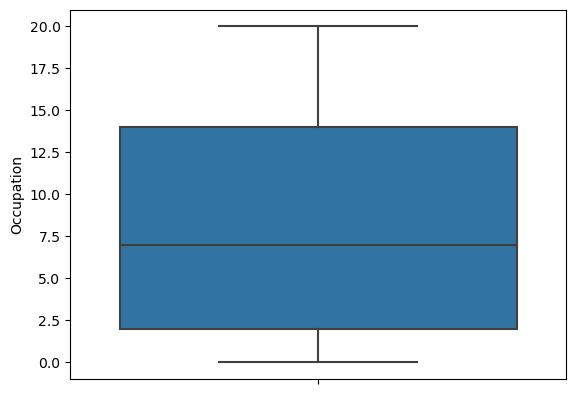

In [16]:
# Outlier Treatment

sns.boxplot(data=df, y= 'Occupation')

<Axes: ylabel='Purchase'>

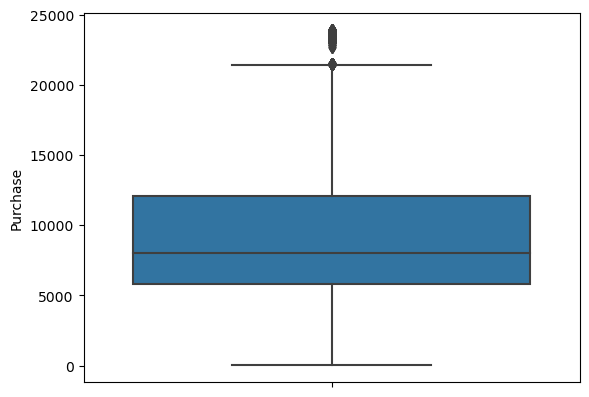

In [17]:
sns.boxplot(data=df, y= 'Purchase')

In [18]:
#Clipping the data for Purchase column
pur_5 = round(np.percentile(df['Purchase'],5))
pur_95 = round(np.percentile(df['Purchase'], 95))
df['Purchase'] = np.clip(df['Purchase'], pur_5, pur_95)

## Non-Graphical Analysis

In [19]:
df['User_ID'].nunique()

5891

In [20]:
df['Product_ID'].nunique()

3631

In [27]:
# Customers based on gender
gender_df = df.groupby(['User_ID','Gender'])['Purchase'].sum().reset_index()
gender_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

In [29]:
# Customers based on Marital status
marriage_df = df.groupby(['User_ID','Marital_Status'])['Purchase'].sum().reset_index()
marriage_df['Marital_Status'].value_counts()

Marital_Status
Unmarried    3417
Married      2474
Name: count, dtype: int64

## Graphical Analysis

In [43]:
city_df['City_Category'].value_counts()

City_Category
C    3139
B    1707
A    1045
Name: count, dtype: int64

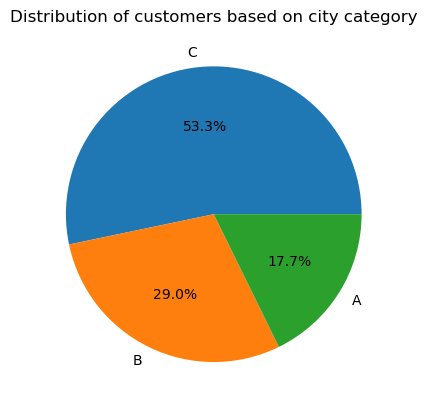

In [45]:
# Customers according to city
city_df = df.groupby(['User_ID','City_Category'])['Purchase'].sum().reset_index()

plt.pie(city_df['City_Category'].value_counts(), autopct='%2.1f%%', labels=city_df['City_Category'].value_counts().index)
plt.title('Distribution of customers based on city category')
plt.show()

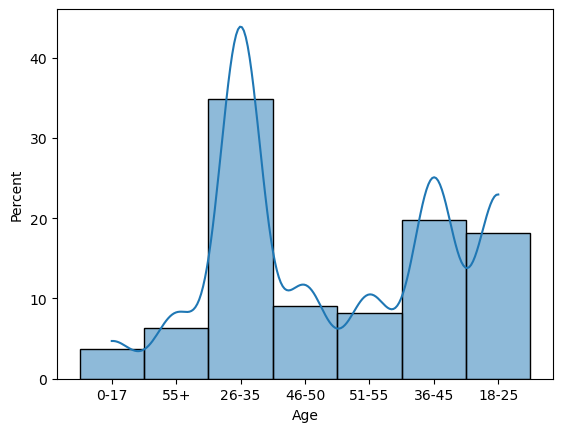

In [52]:
age_df = df.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()

sns.histplot(data=age_df, x='Age', stat='percent', kde=True, discrete=True)
plt.show()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

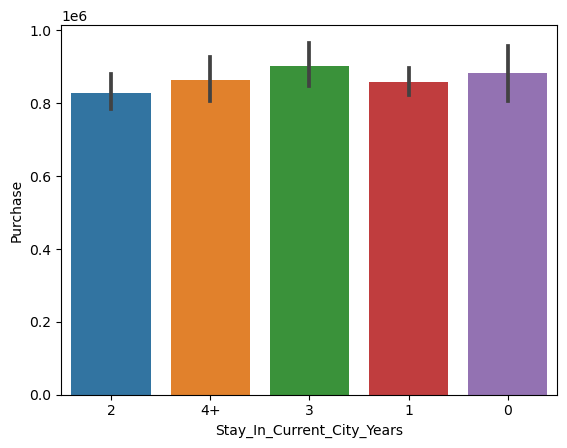

In [56]:
stay_df = df.groupby(['User_ID','Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()

sns.barplot(data=stay_df, x='Stay_In_Current_City_Years', y='Purchase')

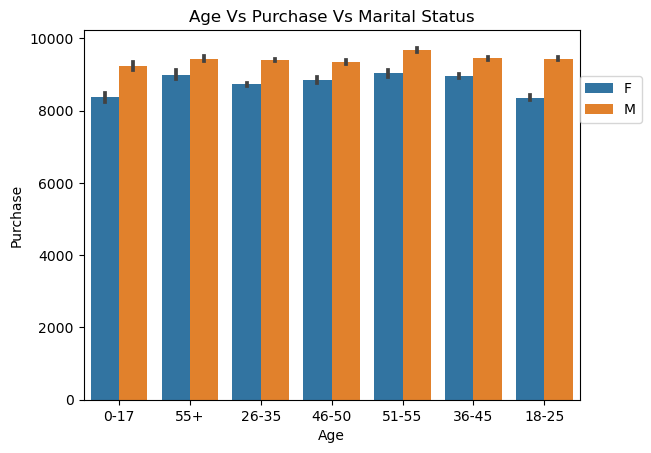

In [65]:
sns.barplot(data=df, x='Age', y='Purchase', hue='Gender')
plt.title('Age Vs Purchase Vs Marital Status')
plt.legend(loc=(1,0.75))
plt.show()

In [66]:
# Correlation
df[['Occupation', 'Purchase']].corr()

,Occupation,Purchase
Occupation,1.00000,0.02122
Purchase,0.02122,1.00000


C:\Users\ShubhamYeole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


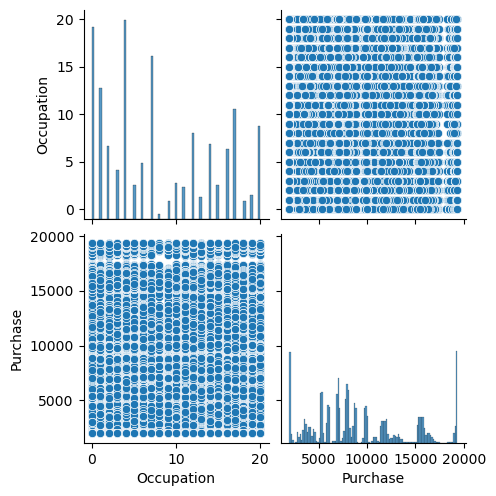

In [69]:
sns.pairplot(df[['Occupation', 'Purchase']])
plt.show()

Summary: 

1. We have a predominantly young customer base, with the majority falling between 18 and 45 years old.
2. Customers residing in City Category C comprise a notable segment of our clientele, suggesting expansion potential in similar urban areas.
3. Product categories 1, 5, and 8 enjoy popularity across both genders.
4. Purchase amounts remain stable regardless of how long a customer has lived in their current city, age, or marital status.
5. The time spent in a current occupation shows no direct impact on purchase amounts.

## Bootstrapping and CI

In [71]:
# Function to find the sample means using bootstrapping approach
def bootstrap(data,iterations=1000):
    sample_array = [] # List to store all the samples
    sample_mean = [] # List to store the sample mean of all the samples
    n = len(data) # Length of sample size
    for i in range(iterations): # Iterating 1000 times to generate 1000 different samples
        sample_array.append(data.sample(n,replace=True))
        sample_mean.append(np.mean(sample_array[i]))
    return sample_mean

In [72]:
def ci(data,confidence=95):
    mean = np.mean(data) #Finding the sample mean (xbar)
    std_err = stats.sem(data) # Calculating the standard error
    z = stats.norm.ppf((1+(confidence/100))/2) # Calculating the Z value for 95% significanc
    margin = list((np.round((mean - z*std_err),2),np.round((mean + z*std_err),2)))
    return margin

## Answering Questions

In [70]:
# 1. Gender effect on purchase
male_expense = gender_df.loc[gender_df['Gender']=='M']['Purchase'].reset_index(drop=True)
female_expense = gender_df.loc[gender_df['Gender']=='F']['Purchase'].reset_index(drop=True)


<Figure size 500x1000 with 0 Axes>

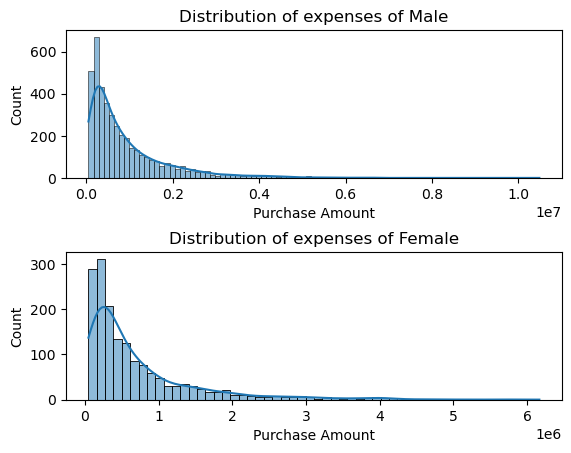

In [73]:
# Plot to visualise the Purchase Amount across both the genders
plt.figure(figsize=[5,10])
plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
sns.histplot(male_expense,kde=True)
plt.title('Distribution of expenses of Male')
plt.xlabel('Purchase Amount')
plt.subplot(2,1,2)
sns.histplot(female_expense,kde=True)
plt.title('Distribution of expenses of Female')
plt.xlabel('Purchase Amount')
plt.show()


In [75]:
male_avg = round(male_expense.mean(),2)
female_avg = round(female_expense.mean(),2)
print("Average age of male customer:", male_avg)
print("Average age of female customer:", female_avg)

Average age of male customer: 924335.96
Average age of female customer: 712185.35



Confidence Interval of males for sample size: 300

Male CI: [ 815832.38 1035046.08]
Female CI: [631472.35 807278.57]

Confidence Interval of males for sample size: 3000

Male CI: [895802.98 964228.68]
Female CI: [681897.71 739356.41]

Confidence Interval of males for sample size: 30000

Male CI: [905593.62 928459.98]
Female CI: [705132.33 722975.35]


<Figure size 1000x3000 with 0 Axes>

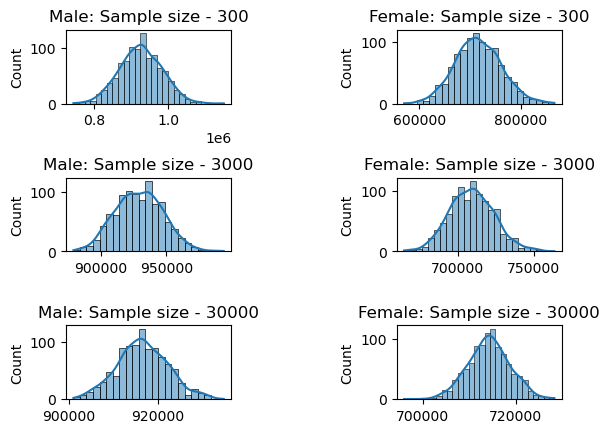

In [78]:
sample_size = [300,3000,30000]
plt.figure(figsize=[10,30])
plt.subplots(3,2)
plt.subplots_adjust(wspace=1,hspace=1)
i=1
for size in sample_size:
    plt.subplot(3,2,i)
    plt.title(f'Male: Sample size - {size}')
    print(f'\nConfidence Interval of males for sample size: {size}')
    male_sample = male_expense.sample(size,replace=True)
    male_bootstrap_means = bootstrap(male_sample)
    male_ci = np.round(np.percentile(male_bootstrap_means,[2.5,97.5]),2)
    print('\nMale CI:',male_ci)
    sns.histplot(male_bootstrap_means,kde=True)
    i+=1

    plt.subplot(3,2,i)
    plt.title(f'Female: Sample size - {size}')
    female_sample = female_expense.sample(size,replace=True)
    female_bootstrap_means = bootstrap(female_sample)
    female_ci = np.round(np.percentile(female_bootstrap_means,[2.5,97.5]),2)
    print('Female CI:',female_ci)
    sns.histplot(female_bootstrap_means,kde=True)
    i+=1
  

plt.show() 

In [79]:
sample_size = [300,3000,30000]
print('For 90% Confidence Interval:')
for size in sample_size:
    print(f'\nConfidence Interval of males for sample size: {size}')
    male_sample_90 = male_expense.sample(size,replace=True)
    male_bootstrap_means_90 = bootstrap(male_sample_90)
    male_ci_90 = np.round(np.percentile(male_bootstrap_means_90,[5,95]),2)
    print('\nMale CI:',male_ci_90)

    female_sample_90 = female_expense.sample(size,replace=True)
    female_bootstrap_means_90 = bootstrap(female_sample_90)
    female_ci_90 = np.round(np.percentile(female_bootstrap_means,[5,95]),2)
    print('Female CI:',female_ci_90)

For 90% Confidence Interval:

Confidence Interval of males for sample size: 300

Male CI: [ 937171.77 1132794.81]
Female CI: [706968.27 721842.58]

Confidence Interval of males for sample size: 3000

Male CI: [893431.17 956327.17]
Female CI: [706968.27 721842.58]

Confidence Interval of males for sample size: 30000

Male CI: [906106.26 924698.18]
Female CI: [706968.27 721842.58]


In [80]:
# Calculating CI for different sample sizes
sample_size = [300,3000,30000]
print('For 99% Confidence Interval:')
for size in sample_size:
    print(f'\nConfidence Interval of males for sample size: {size}')
    male_sample_99 = male_expense.sample(size,replace=True)
    male_bootstrap_means_99 = bootstrap(male_sample_99)
    male_ci_99 = np.round(np.percentile(male_bootstrap_means_99,[0.5,99.5]),2)
    print('\nMale CI:',male_ci_99)

    female_sample_99 = female_expense.sample(size,replace=True)
    female_bootstrap_means_99 = bootstrap(female_sample_99)
    female_ci_99 = np.round(np.percentile(female_bootstrap_means,[0.5,99.5]),2)
    print('Female CI:',female_ci_99)

For 99% Confidence Interval:

Confidence Interval of males for sample size: 300

Male CI: [ 754086.67 1011148.91]
Female CI: [703103.7  726113.67]

Confidence Interval of males for sample size: 3000

Male CI: [896614.64 985762.65]
Female CI: [703103.7  726113.67]

Confidence Interval of males for sample size: 30000

Male CI: [911765.71 942708.01]
Female CI: [703103.7  726113.67]


INSIGHTS:
1. Male average purchase: USD 924,335.96; Female average purchase: USD 712,185.35.
2. Female CI range exceeds male due to smaller dataset size.
3. Larger samples yield narrower CIs as standard error decreases and precision increases.
4. Higher confidence levels lead to wider CIs due to z-score dependency on confidense level.
5. Non-overlapping CIs suggest gender-specific purchase trends.
6. More samples result in smoother distributions resembling a normal curve.


## Effect of Marital Status on Purchase Amount

In [82]:
married_expense = marriage_df.loc[marriage_df['Marital_Status']=='Married']['Purchase'].reset_index(drop=True)
unmarried_expense = marriage_df.loc[marriage_df['Marital_Status']=='Unmarried']['Purchase'].reset_index(drop=True)


<Figure size 500x1000 with 0 Axes>

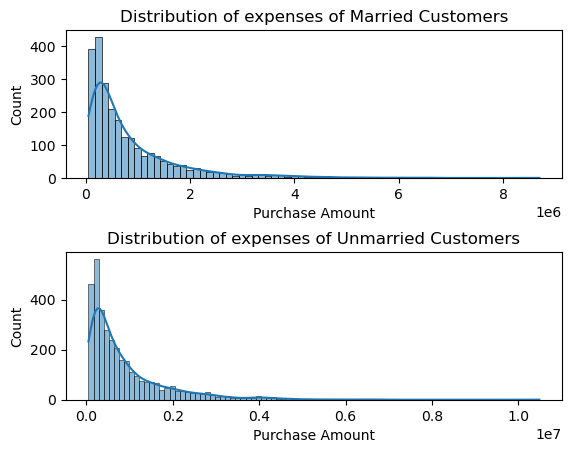

In [83]:
plt.figure(figsize=[5,10])
plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
sns.histplot(married_expense,kde=True)
plt.title('Distribution of expenses of Married Customers')
plt.xlabel('Purchase Amount')
plt.subplot(2,1,2)
sns.histplot(unmarried_expense,kde=True)
plt.title('Distribution of expenses of Unmarried Customers')
plt.xlabel('Purchase Amount')
plt.show()

In [85]:
married_avg = np.round(married_expense.mean(),2)
unmarried_avg = np.round(unmarried_expense.mean(),2)
print("Married CI (95%) for entire dataset:", married_avg )
print("Unmarried CI (95%) for entire dataset:", unmarried_avg )

Married CI (95%) for entire dataset: 842843.25
Unmarried CI (95%) for entire dataset: 879902.26



Confidence Interval for sample size: 300

Married CI: [675669.14 856790.79]
Unmarried CI: [ 786818.06 1010712.74]

Confidence Interval for sample size: 3000

Married CI: [801098.03 867976.9 ]
Unmarried CI: [837618.34 904758.37]

Confidence Interval for sample size: 30000

Married CI: [827691.26 848734.66]
Unmarried CI: [871812.87 893017.94]


<Figure size 1000x3000 with 0 Axes>

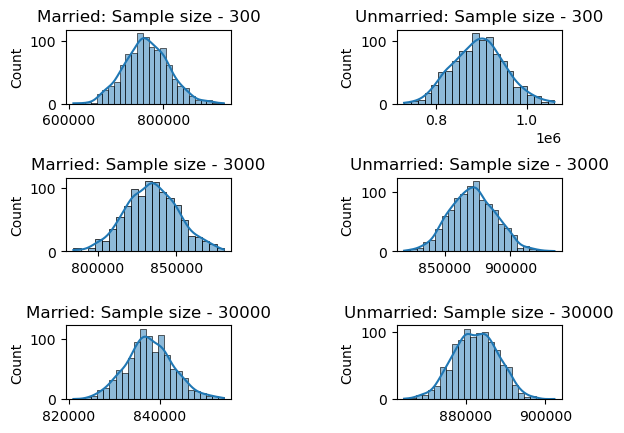

In [86]:
sample_size = [300,3000,30000]
plt.figure(figsize=[10,30])
plt.subplots(3,2)
plt.subplots_adjust(wspace=1,hspace=1)
i=1
for size in sample_size:
    plt.subplot(3,2,i)
    plt.title(f'Married: Sample size - {size}')
    print(f'\nConfidence Interval for sample size: {size}')
    married_sample = married_expense.sample(size,replace=True)
    married_bootstrap_means = bootstrap(married_sample)
    married_ci = np.round(np.percentile(married_bootstrap_means,[2.5,97.5]),2)
    print('\nMarried CI:',married_ci)
    sns.histplot(married_bootstrap_means,kde=True)
    i+=1

    plt.subplot(3,2,i)
    plt.title(f'Unmarried: Sample size - {size}')
    unmarried_sample = unmarried_expense.sample(size,replace=True)
    unmarried_bootstrap_means = bootstrap(unmarried_sample)
    unmarried_ci = np.round(np.percentile(unmarried_bootstrap_means,[2.5,97.5]),2)
    print('Unmarried CI:',unmarried_ci)
    sns.histplot(unmarried_bootstrap_means,kde=True)
    i+=1
plt.show() 

INSIGHTS:
1. Married customers' average purchase: USD 842,843.25; Unmarried customers' average purchase: USD 879,902.26.
2. Married customers' confidence interval range slightly exceeds unmarried customers' due to the larger unmarried sample size.
3. Increasing sample size leads to narrower confidence intervals, enhancing precision.
4. Overlapping confidence intervals indicate purchase trends are independent of marital status.
5. Larger samples yield distributions resembling a normal curve, enhancing data representation.

## Effect of Age Groups on Purchase Amount


In [88]:
age_0_17_expense = age_df.loc[age_df['Age']=='0-17']['Purchase'].reset_index(drop=True)
age_18_25_expense = age_df.loc[age_df['Age']=='18-25']['Purchase'].reset_index(drop=True)
age_26_35_expense = age_df.loc[age_df['Age']=='26-35']['Purchase'].reset_index(drop=True)
age_36_45_expense = age_df.loc[age_df['Age']=='36-45']['Purchase'].reset_index(drop=True)
age_46_50_expense = age_df.loc[age_df['Age']=='46-50']['Purchase'].reset_index(drop=True)
age_51_55_expense = age_df.loc[age_df['Age']=='51-55']['Purchase'].reset_index(drop=True)
age_55_expense = age_df.loc[age_df['Age']=='55+']['Purchase'].reset_index(drop=True)


In [89]:
age_0_17_avg = round(age_0_17_expense.mean(),2)
age_18_25_avg = round(age_18_25_expense.mean(),2)
age_26_35_avg = round(age_26_35_expense.mean(),2)
age_36_45_avg = round(age_36_45_expense.mean(),2)
age_46_50_avg = round(age_46_50_expense.mean(),2)
age_51_55_avg = round(age_51_55_expense.mean(),2)
age_55_avg = round(age_55_expense.mean(),2)
print(f"Average expense of Customer's in Age Group 0-17 years: {age_0_17_avg}\n")
print(f"Average expense of Customer's in Age Group 18-25 years: {age_18_25_avg}\n")
print(f"Average expense of Customer's in Age Group 26-35 years: {age_26_35_avg}\n")
print(f"Average expense of Customer's in Age Group 36-45 years: {age_36_45_avg}\n")
print(f"Average expense of Customer's in Age Group 46-50 years: {age_46_50_avg}\n")
print(f"Average expense of Customer's in Age Group 51-55 years: {age_51_55_avg}\n")
print(f"Average expense of Customer's in Age Group 55+ years: {age_55_avg}")


Average expense of Customer's in Age Group 0-17 years: 619365.51

Average expense of Customer's in Age Group 18-25 years: 854802.28

Average expense of Customer's in Age Group 26-35 years: 988706.26

Average expense of Customer's in Age Group 36-45 years: 878871.13

Average expense of Customer's in Age Group 46-50 years: 792168.87

Average expense of Customer's in Age Group 51-55 years: 761604.47

Average expense of Customer's in Age Group 55+ years: 539206.82


In [92]:
print('Age Group 0-17 years CI (95%) for entire dataset: ',ci(age_0_17_expense))
print('\nAge Group 18-25 years CI (95%) for entire dataset:',ci(age_18_25_expense))
print('\nAge Group 26-35 years CI (95%) for entire dataset:',ci(age_26_35_expense))
print('\nAge Group 36-45 years CI (95%) for entire dataset:',ci(age_36_45_expense))
print('\nAge Group 46-50 years CI (95%) for entire dataset:',ci(age_46_50_expense))
print('\nAge Group 51-55 years CI (95%) for entire dataset:',ci(age_51_55_expense))
print('\nAge Group 55+ years CI (95%) for entire dataset:',ci(age_55_expense))

Age Group 0-17 years CI (95%) for entire dataset:  [528355.82, 710375.21]

Age Group 18-25 years CI (95%) for entire dataset: [801603.86, 908000.69]

Age Group 26-35 years CI (95%) for entire dataset: [944134.87, 1033277.64]

Age Group 36-45 years CI (95%) for entire dataset: [822595.89, 935146.37]

Age Group 46-50 years CI (95%) for entire dataset: [713164.65, 871173.08]

Age Group 51-55 years CI (95%) for entire dataset: [690991.69, 832217.25]

Age Group 55+ years CI (95%) for entire dataset: [476569.66, 601843.98]


In [93]:
sample_size = [300,3000,30000]
for size in sample_size:
    print(f'\nFOR SAMPLE SIZE = {size}')

    age_0_17_sample = age_0_17_expense.sample(size,replace=True)
    age_0_17_bootstrap_means = bootstrap(age_0_17_sample)
    age_0_17_ci = np.round(np.percentile(age_0_17_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 0-17 years',age_0_17_ci)

    age_18_25_sample = age_18_25_expense.sample(size,replace=True)
    age_18_25_bootstrap_means = bootstrap(age_18_25_sample)
    age_18_25_ci = np.round(np.percentile(age_18_25_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 18-25 years',age_18_25_ci)

    age_26_35_sample = age_26_35_expense.sample(size,replace=True)
    age_26_35_bootstrap_means = bootstrap(age_26_35_sample)
    age_26_35_ci = np.round(np.percentile(age_26_35_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 26-35 years',age_26_35_ci)

    age_36_45_sample = age_36_45_expense.sample(size,replace=True)
    age_36_45_bootstrap_means = bootstrap(age_36_45_sample)
    age_36_45_ci = np.round(np.percentile(age_36_45_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 36-45 years',age_36_45_ci)

    age_46_50_sample = age_46_50_expense.sample(size,replace=True)
    age_46_50_bootstrap_means = bootstrap(age_46_50_sample)
    age_46_50_ci = np.round(np.percentile(age_46_50_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 46-50 years',age_46_50_ci)

    age_51_55_sample = age_51_55_expense.sample(size,replace=True)
    age_51_55_bootstrap_means = bootstrap(age_51_55_sample)
    age_51_55_ci = np.round(np.percentile(age_51_55_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 51-55 years',age_51_55_ci)

    age_55_sample = age_55_expense.sample(size,replace=True)
    age_55_bootstrap_means = bootstrap(age_55_sample)
    age_55_ci = np.round(np.percentile(age_55_bootstrap_means,[2.5,97.5]),2)
    print('\n CI of Age Group: 55+ years',age_55_ci)


FOR SAMPLE SIZE = 300

 CI of Age Group: 0-17 years [544924.01 702423.51]

 CI of Age Group: 18-25 years [735643.77 942473.15]

 CI of Age Group: 26-35 years [ 848791.96 1084597.41]

 CI of Age Group: 36-45 years [735866.68 926324.13]

 CI of Age Group: 46-50 years [630830.43 831913.56]

 CI of Age Group: 51-55 years [729196.77 921680.97]

 CI of Age Group: 55+ years [451750.75 577874.23]

FOR SAMPLE SIZE = 3000

 CI of Age Group: 0-17 years [597172.61 646625.77]

 CI of Age Group: 18-25 years [820146.56 882055.63]

 CI of Age Group: 26-35 years [ 928973.74 1004753.75]

 CI of Age Group: 36-45 years [858598.55 929078.28]

 CI of Age Group: 46-50 years [753465.69 818180.9 ]

 CI of Age Group: 51-55 years [738443.96 794830.01]

 CI of Age Group: 55+ years [512078.16 556564.98]

FOR SAMPLE SIZE = 30000

 CI of Age Group: 0-17 years [613787.49 628937.55]

 CI of Age Group: 18-25 years [847305.3  866788.47]

 CI of Age Group: 26-35 years [974847.72 997144.59]

 CI of Age Group: 36-45 years

INSIGHTS:
1. Average purchase by age group: 0-17 yrs: USD 619,365.51, 18-25 yrs: USD 854,802.28, 26-35 yrs: USD 988,706.26,
36-45 yrs: USD 878,871.13, 46-50 yrs: USD 792,168.87, 51-55 yrs: USD 761,604.47, 55+ yrs: USD 539,206.82.
2. The 0-17 yrs age group has the widest CI range, while 26-35 yrs has the narrowest due to larger sample sizes leading
to narrower CIs.
3. CIs for the 0-17 yrs and 55+ age groups indicate lower spending compared to others. The highest spenders are in the
26-35 yrs age group.


## Recommendations

1. Gender-Targeted Promotions: Since a clear difference exists in male and female purchase amounts during Black Friday events, Walmart should develop differentiated promotional strategies by gender.
    - Promote higher-ticket items or bundled offers for male customers since they exhibit higher spending averages.
    - Design campaigns for female customers that include discounts, bundled value purchases, or emphasize product variety tailored to demonstrated interests.
    
2. City Category C Expansion: With this classification showing concentrated customer clusters, investigate other Category C cities across different regions for targeted expansion. Analyze factors like demographics, local market competition, and income levels to make informed decisions.

3. Optimize Product Mix: Focus inventory for product categories 1, 5, and 8 within both male and female demographics to capitalize on their popularity across genders.

4. Age-Specific Promotions: Since insights reveal purchase variations across age groups, craft different campaigns catered to spending levels of specific age ranges.
    - Target the highest spending 26-35 year old demographic with offers showcasing high-value or popular products.
    - Consider incentives and bundled offers that emphasize affordability for young adults (18-25) while still highlighting relevant trends.
    
5. Marital Status Tailoring: While marital status shows minimal overall impact, track any purchase variances within certain product categories to understand if targeted offers might subtly boost conversions (e.g., family items for married shoppers).